In [1]:
""" @author: bhushan
    
"""
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from synthetic_data_experiment_functions import *
import sys; sys.path.append("..") # Adds parent directory to python modules path.
from topdown_parsers import *

**Important differences between ToyMultiAttribute (TMA) Outputs and these plots:**
* The inputs and outputs here are integers whereas the TMA ones are floats.
* The outputs of TMA have only two races. The runs here have 2 races as inputs but > 2 races as outputs.
* The TMA plots are made of 1000 runs each, these are 100 runs each. (Because of time constraints. 100 runs takes about an hour on AWS. 4 eps budgets x 3 split permutations = 12 plots took roughly 12 hrs to complete.)

In [2]:
# setting some variables we will need
state_id = 1     # FIPS code of Alabama, from which I extracted the 1940s lines
race = 1         # The race we compare for ER is coded in as `1` in our inputs.
num_runs = 100   # Each configuration had 100 runs.
synthetic_data_dir = "./cleaned_synthetic/"     # filepath to runs on synthetically generated data
full_county_data_dir = "./cleaned_full_county/" # filepath to runs on 9 full districts

# just setting coordinates to position each plot
synthetic_exp2coords_map = dict({
    "synthetic_bottom_heavy_0point25.ini": (0,2),
    "synthetic_mid_heavy_0point25.ini": (0,1),
    "synthetic_top_heavy_0point25.ini": (0,0),
    "synthetic_bottom_heavy_0point50.ini": (1,2),
    "synthetic_mid_heavy_0point50.ini": (1,1),
    "synthetic_top_heavy_0point50.ini": (1,0),
    "synthetic_bottom_heavy_1.ini": (2,2),
    "synthetic_mid_heavy_1.ini": (2,1),
    "synthetic_top_heavy_1.ini": (2,0),
    "synthetic_bottom_heavy_2.ini": (3,2),
    "synthetic_mid_heavy_2.ini": (3,1),
    "synthetic_top_heavy_2.ini": (3,0)
})

full_county_exp2coords_map = dict({
    "full_county_bottom_heavy_0point25.ini": (0,2),
    "full_county_mid_heavy_0point25.ini": (0,1),
    "full_county_top_heavy_0point25.ini": (0,0),
    "full_county_bottom_heavy_0point50.ini": (1,2),
    "full_county_mid_heavy_0point50.ini": (1,1),
    "full_county_top_heavy_0point50.ini": (1,0),
    "full_county_bottom_heavy_1.ini": (2,2),
    "full_county_mid_heavy_1.ini": (2,1),
    "full_county_top_heavy_1.ini": (2,0),
    "full_county_bottom_heavy_2.ini": (3,2),
    "full_county_mid_heavy_2.ini": (3,1),
    "full_county_top_heavy_2.ini": (3,0)
})


"""
The following is the order the districts should be ordered in for their runs. This is important because I
simply extracted people (and household) lines from Alabama 1940s, but then changed their races to fit the 
race %s needed for the synthetic ER line. 

The first (county, dist) tuple has the least % of people from race 1, the second tuple has the second-least
and so on. The lists below will be used to re-order the districts in the `runs_df`, and the plot() functions expect 
this ordering.
"""

synthetic_row_order = [(10, 11), (10, 12), (10, 20),
                       (30, 10), (30, 20), (30, 30),
                       (50, 10), (50, 20), (50, 30)]

full_county_row_order = [(10, 11), (10, 12), (10, 20),
                         (30, 30), (30, 40), (30, 50),
                         (50, 20), (50, 30), (50, 40)]

In [3]:
def plot_experiments(data_dir, 
                     experiment2coords_map, 
                     state_id, 
                     race, 
                     county_dists, 
                     er=True):
    
    fig, axs = plt.subplots(4, 3, figsize=(20,20))
    
    for (key, coords) in experiment2coords_map.items():
        dir_name = data_dir + key
        runs_df = collect_by_enumdist(dir_name,
                                      state_id,
                                      race=race,
                                      race_percent=True)
        runs_df = sort_df_by_county_dist(runs_df, county_dists)       
        
        if er: 
            plot(runs_df, num_runs, axs, coords)
        else:
            plot(runs_df, num_runs, axs, coords, hist=True)

    # Label the budget and the splits to the figure
    # these splits go from top to bottom
    axs[0, 0].set_title("Splits[0.50, 0.25, 0.25]")
    axs[0, 1].set_title("Splits[0.25, 0.50, 0.25]")
    axs[0, 2].set_title("Splits[0.25, 0.25, 0.50]")

    pad = 5
    axs[0,0].annotate("Budget:0.25", xy=(0, 0.5), xytext=(-axs[0,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[0,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')
    axs[1,0].annotate("Budget:0.50", xy=(0, 0.5), xytext=(-axs[1,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[1,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')
    axs[2,0].annotate("Budget:1.00", xy=(0, 0.5), xytext=(-axs[2,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[2,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')
    axs[3,0].annotate("Budget:2.00", xy=(0, 0.5), xytext=(-axs[3,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[3,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')

    return fig

### Synthetic Dataset
The total populations in these 9 precincts are:     [345, 366, 260, 289, 294, 279, 200, 211, 151]

The populations of race A in these 9 precincts are: [60, 101, 102, 112, 100, 116, 120, 161, 138]

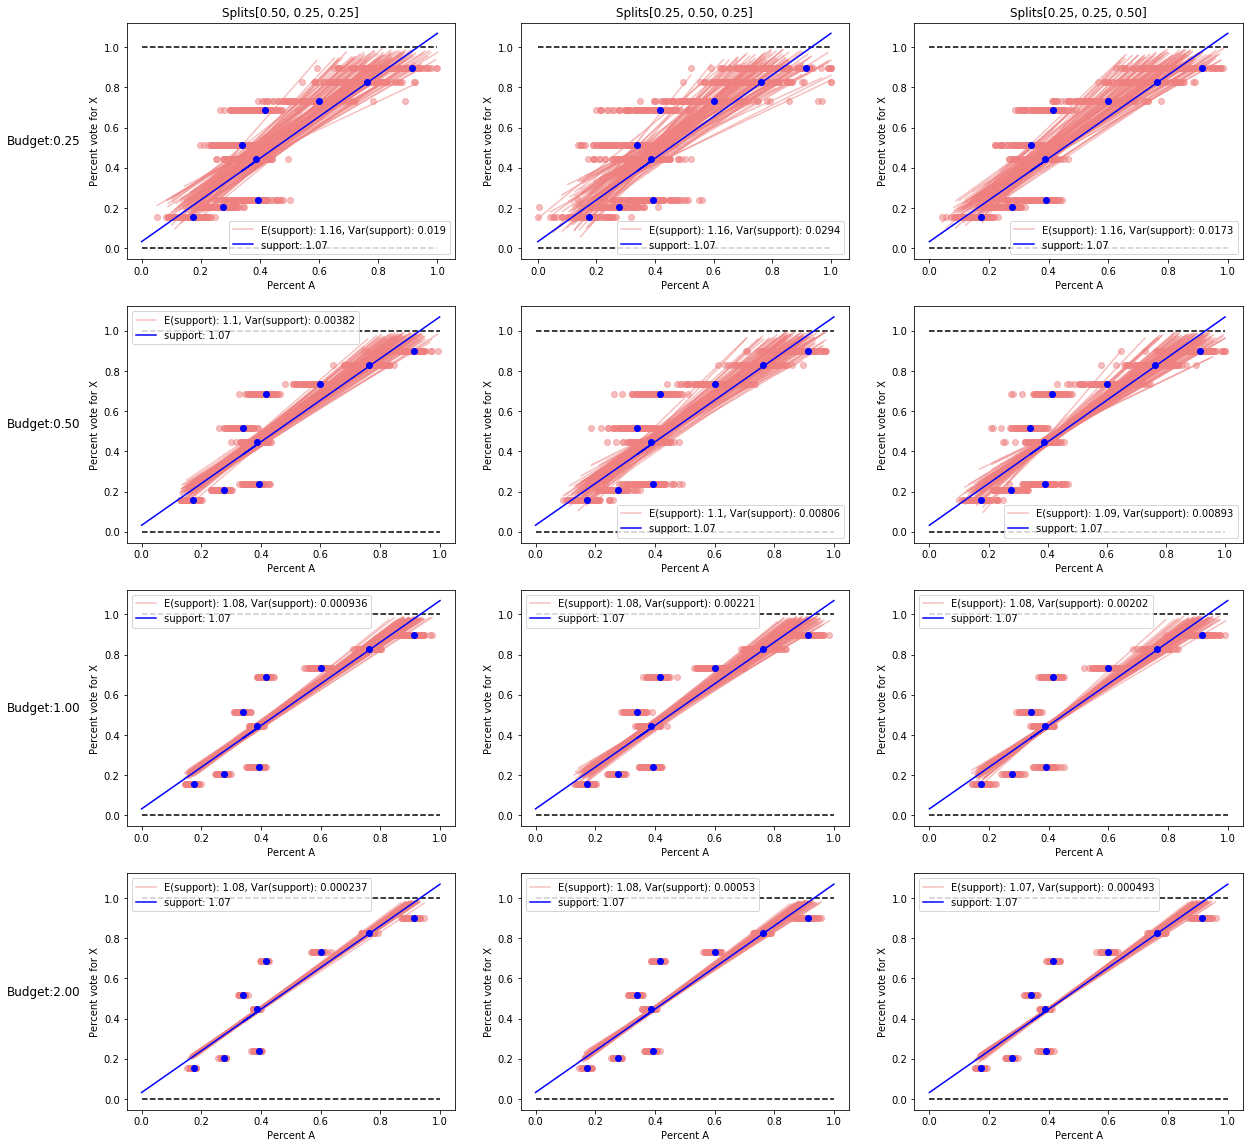

In [4]:
synthetic_er_fig = plot_experiments(synthetic_data_dir, 
                                    synthetic_exp2coords_map, 
                                    state_id, 
                                    race, 
                                    synthetic_row_order,
                                    er=True)

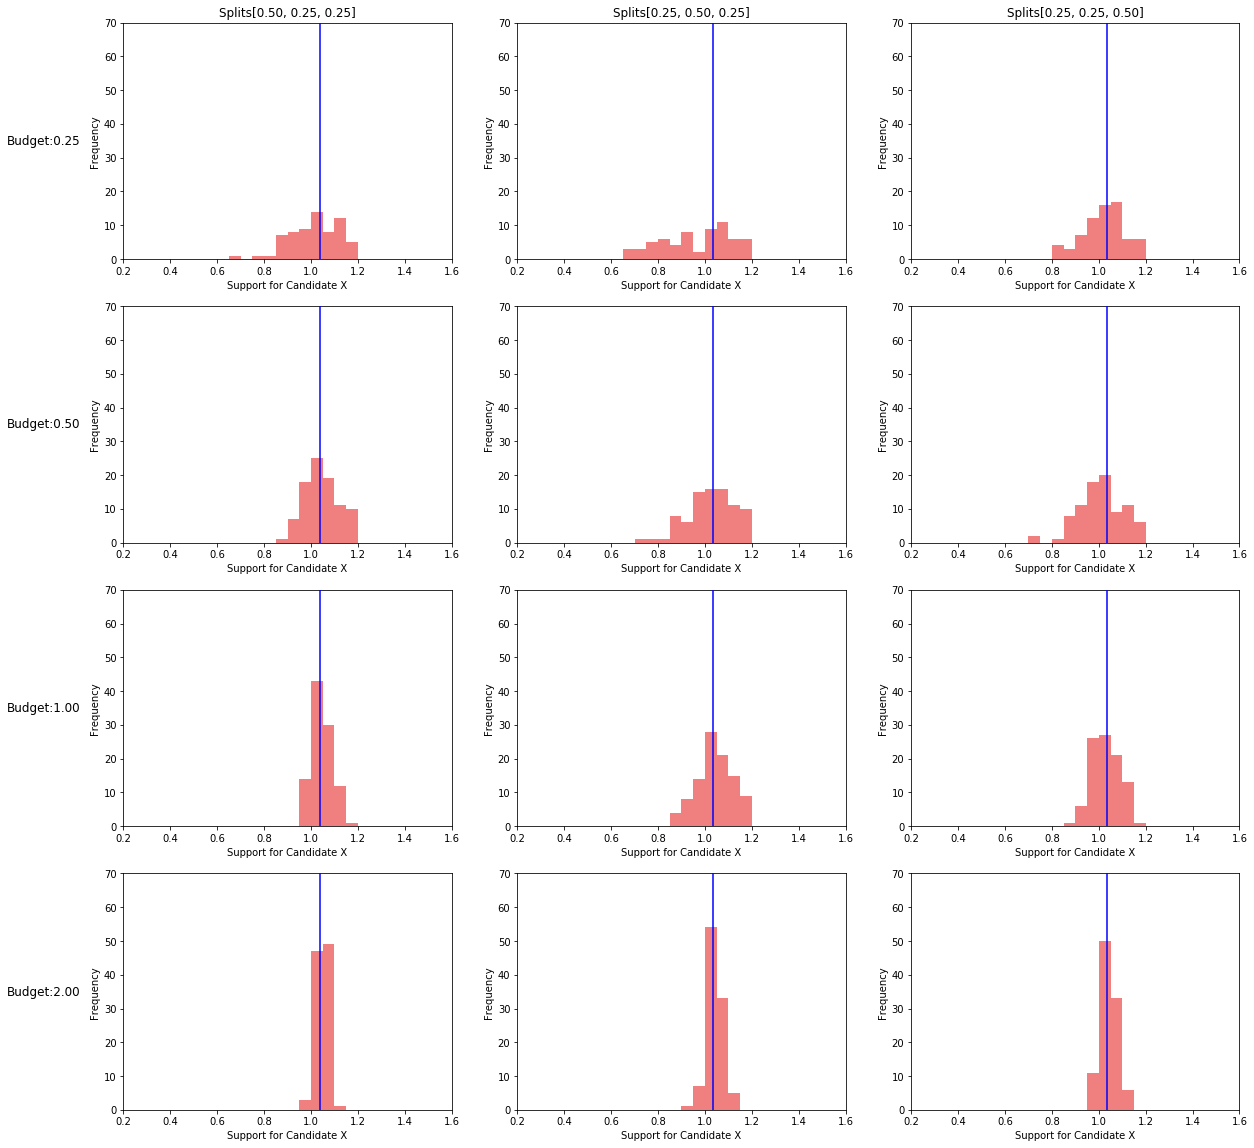

In [5]:
synthetic_hist_fig = plot_experiments(synthetic_data_dir, 
                                      synthetic_exp2coords_map, 
                                      state_id, 
                                      race, 
                                      synthetic_row_order,
                                      er=False)

### Full Enumdist Dataset
In the previous input dataset, I simply extracted the requisite number of lines I needed from each enumdist I wanted. In the following example, I extract the _entire_ enumdist, so the populations are larger. I however do modify the races of these lines to match the ratios in the previous dataset.

The total populations in these 9 enumdists are: [1367, 1299, 2628, 1783, 1770, 1317, 1839, 1040, 876]

The populations of race A in these 9 precincts are: [237, 358, 1030, 690, 602, 547, 1103, 793, 800]

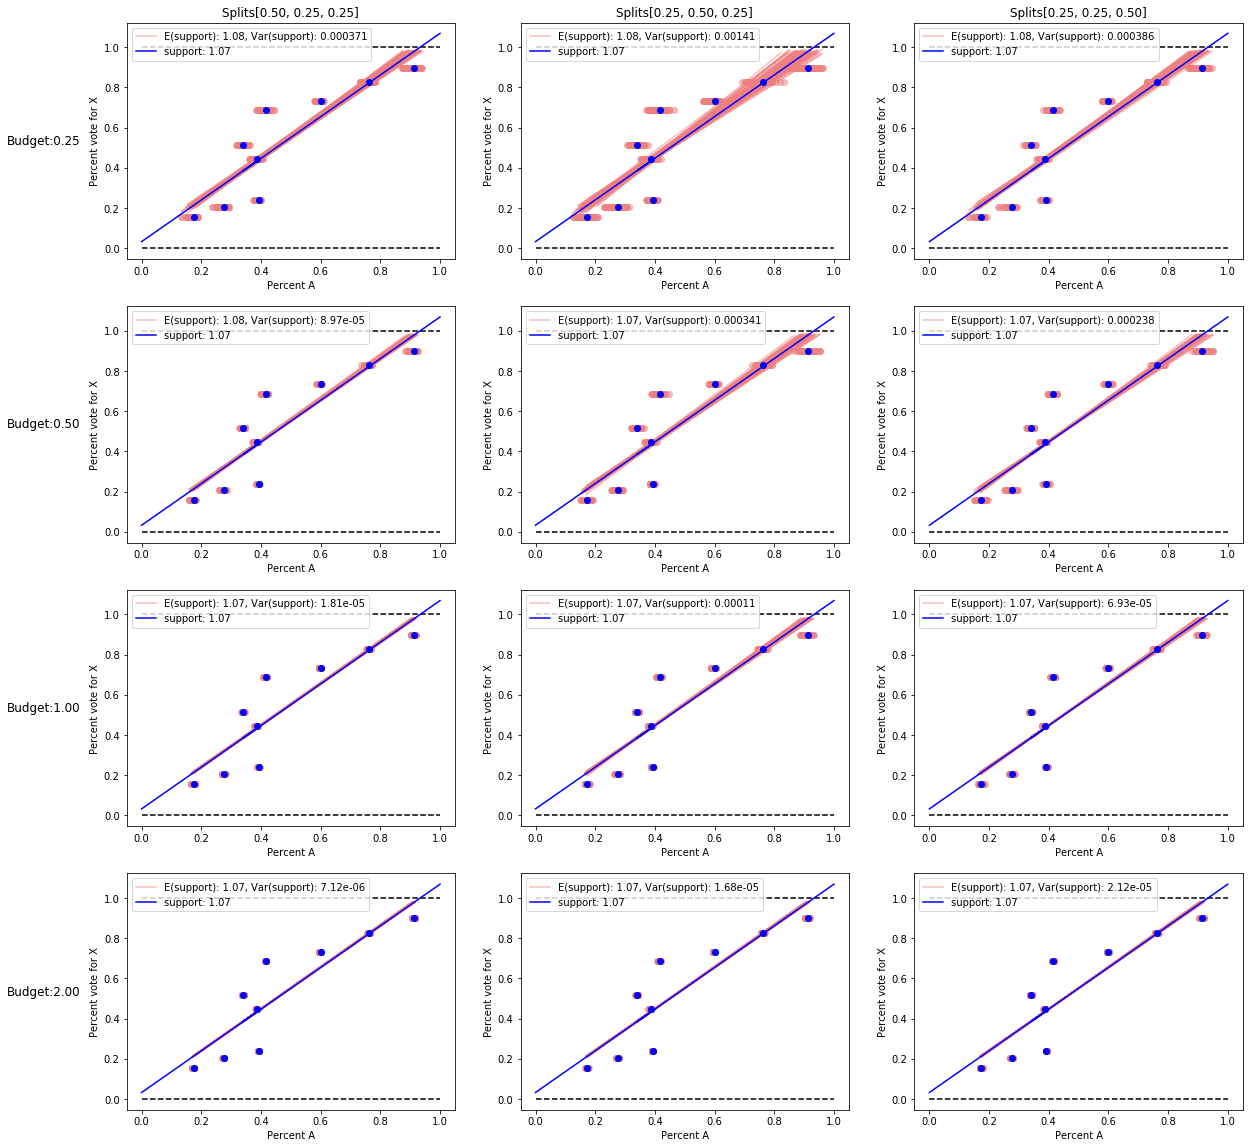

In [6]:
full_county_er_fig = plot_experiments(full_county_data_dir, 
                                      full_county_exp2coords_map, 
                                      state_id, 
                                      race, 
                                      full_county_row_order, 
                                      er=True)

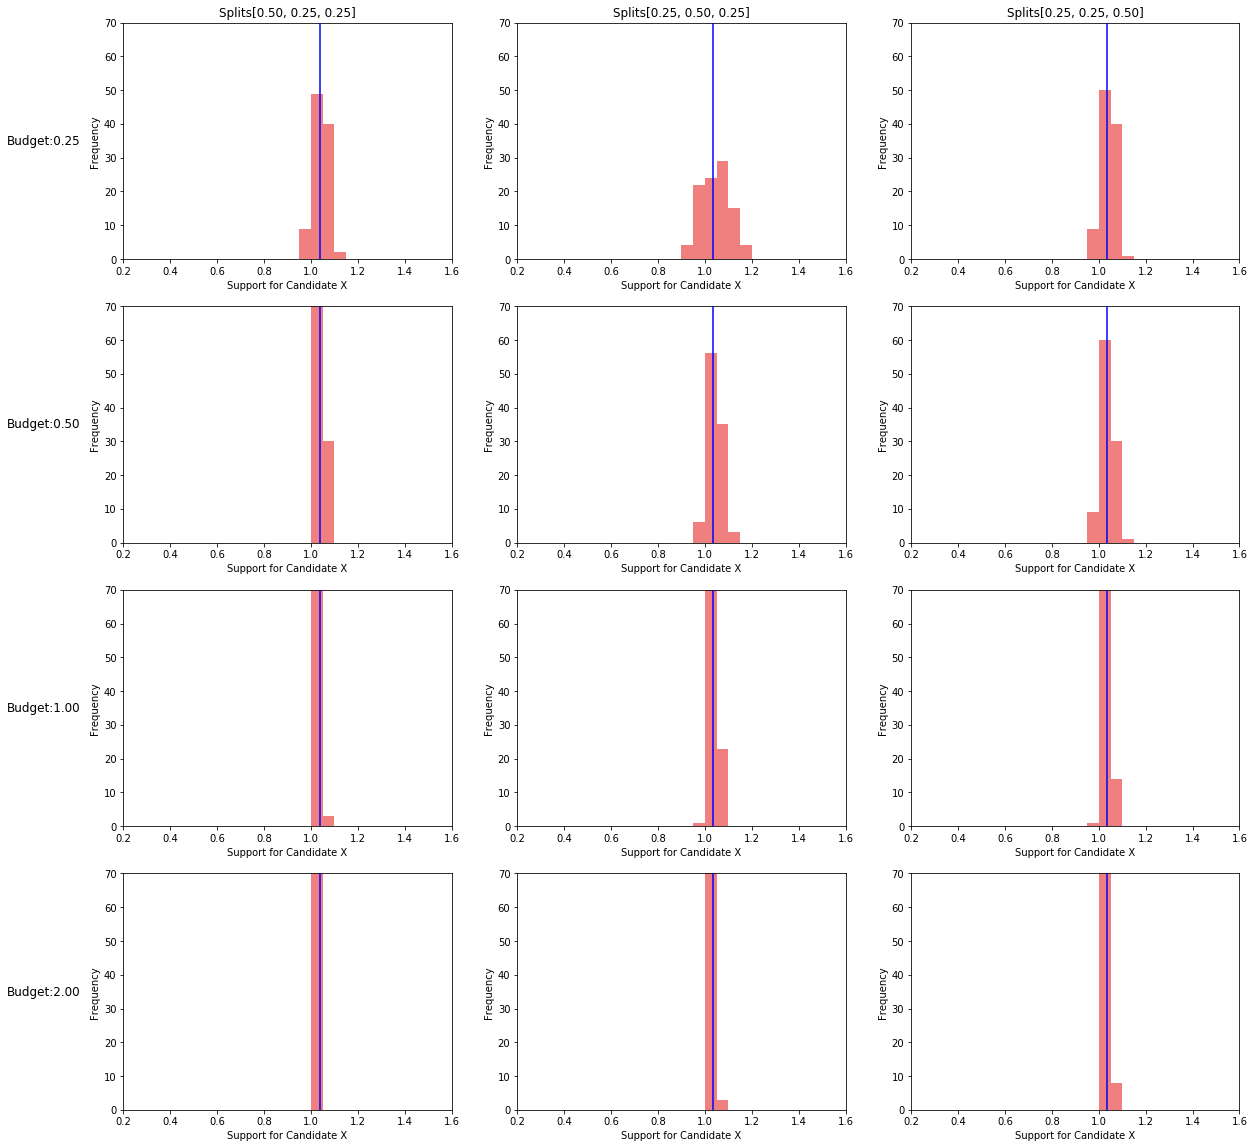

In [7]:
full_county_hist_fig = plot_experiments(full_county_data_dir, 
                                        full_county_exp2coords_map, 
                                        state_id, 
                                        race, 
                                        full_county_row_order,  
                                        er=False)

### Do these plots make sense?
Vertically: 

One would expect that with increased epsilon budget, the noise added would decrease, so the change in slope would be small. That is what we observe, so that makes sense. 

Horizontally:

It is unclear the effect of the splits on the graphs. Surprisingly (for me) it seems that more change in slope is observed when there is more budget on the middle level.

In [8]:
# The best strategy I have found to generate high quality pngs is to save the figure as a PDF and then run 
# the following line on the command line. TODO: there needs to be a cleaner way to do this.
# pdftoppm -png -r 300 synthetic_data_ER.pdf synthetic_data_ER

synthetic_er_fig.savefig("synthetic_data_ER.pdf")
synthetic_hist_fig.savefig("synthetic_data_hists.pdf")
full_county_er_fig.savefig("full_county_ER.pdf")
full_county_hist_fig.savefig("full_county_hists.pdf")